# CS178 Final Project
For our final project, we will be using the Fashion MNIST dataset.

# Project Setup

Here, we will import the necessary libraries needed, with Tensorflow being the main library used for neural network construction. We then load the dataset, split it into training and testing segments, and plot the initial images.

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


Training Set Summary:
Number of training samples: 60000
Number of test samples: 10000
Sample image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


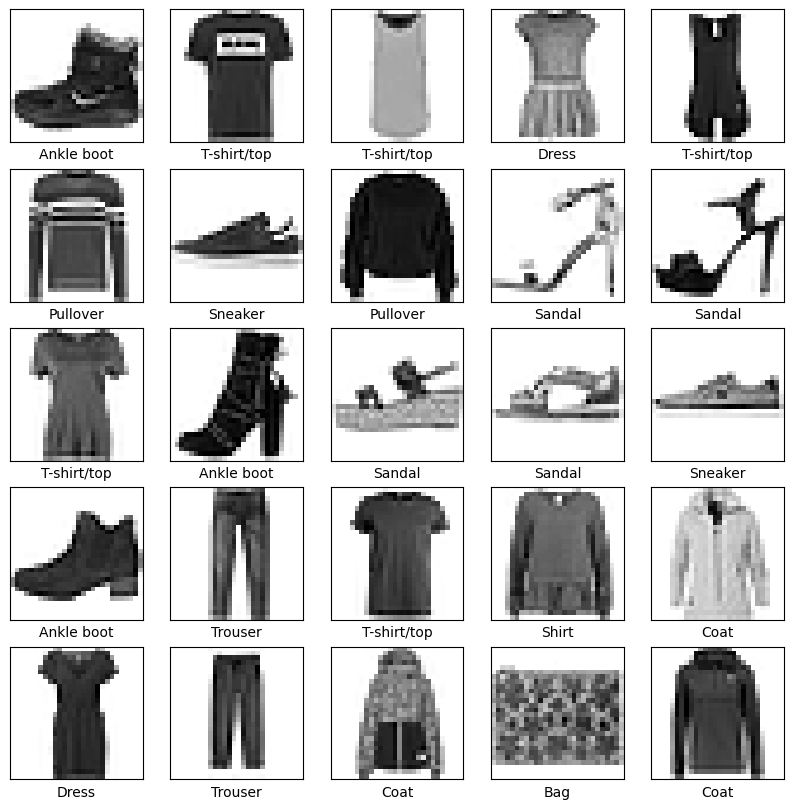

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


!git clone https://github.com/zalandoresearch/fashion-mnist.git

# Split into training and testing sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data description
print("Training Set Summary:")
print(f"Number of training samples: {len(train_labels)}")
print(f"Number of test samples: {len(test_labels)}")
print("Sample image shape:", train_images[0].shape)
print("Unique labels:", np.unique(train_labels))

# Display the first few images with their labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Build the Model

Here, we construct the actual model. We use TensorFlow Keras API in order to efficiently perform this task, defining a simple neural network with one hidden layer. We then compile the actual model.

In [2]:
# Building the neural network model
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)), # Reshape for CNN
    layers.Conv2D(32, (3, 3), activation='relu'), # Convolutional layer
    layers.MaxPooling2D((2, 2)), # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # Convolutional layer
    layers.MaxPooling2D((2, 2)), # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # Convolutional layer
    layers.Flatten(), # Flatten to 1D
    layers.Dense(128, activation='relu'), # Fully connected layer
    layers.Dropout(0.5), # Dropout for regularization
    layers.Dense(10) # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



## Train the Model

In [3]:
# Training the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])



Epoch 1/30
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5861 - accuracy: 0.7849 - val_loss: 0.3991 - val_accuracy: 0.8517
Epoch 2/30
1875/1875 [==============================] - 129s 69ms/step - loss: 0.3703 - accuracy: 0.8660 - val_loss: 0.3475 - val_accuracy: 0.8741
Epoch 3/30
1875/1875 [==============================] - 121s 65ms/step - loss: 0.3200 - accuracy: 0.8843 - val_loss: 0.3170 - val_accuracy: 0.8789
Epoch 4/30
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2853 - accuracy: 0.8973 - val_loss: 0.2762 - val_accuracy: 0.8981
Epoch 5/30
1875/1875 [==============================] - 115s 61ms/step - loss: 0.2610 - accuracy: 0.9045 - val_loss: 0.2669 - val_accuracy: 0.9006
Epoch 6/30
1875/1875 [==============================] - 121s 65ms/step - loss: 0.2430 - accuracy: 0.9109 - val_loss: 0.2753 - val_accuracy: 0.8979
Epoch 7/30
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2260 - accuracy: 0.9170 - val_loss: 0.2

## Evaluate the Model

In [4]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.2654 - accuracy: 0.9067 - 2s/epoch - 7ms/step

Test accuracy: 0.9067000150680542


## Make Predictions

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.87      0.84      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.71      0.75      0.73      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



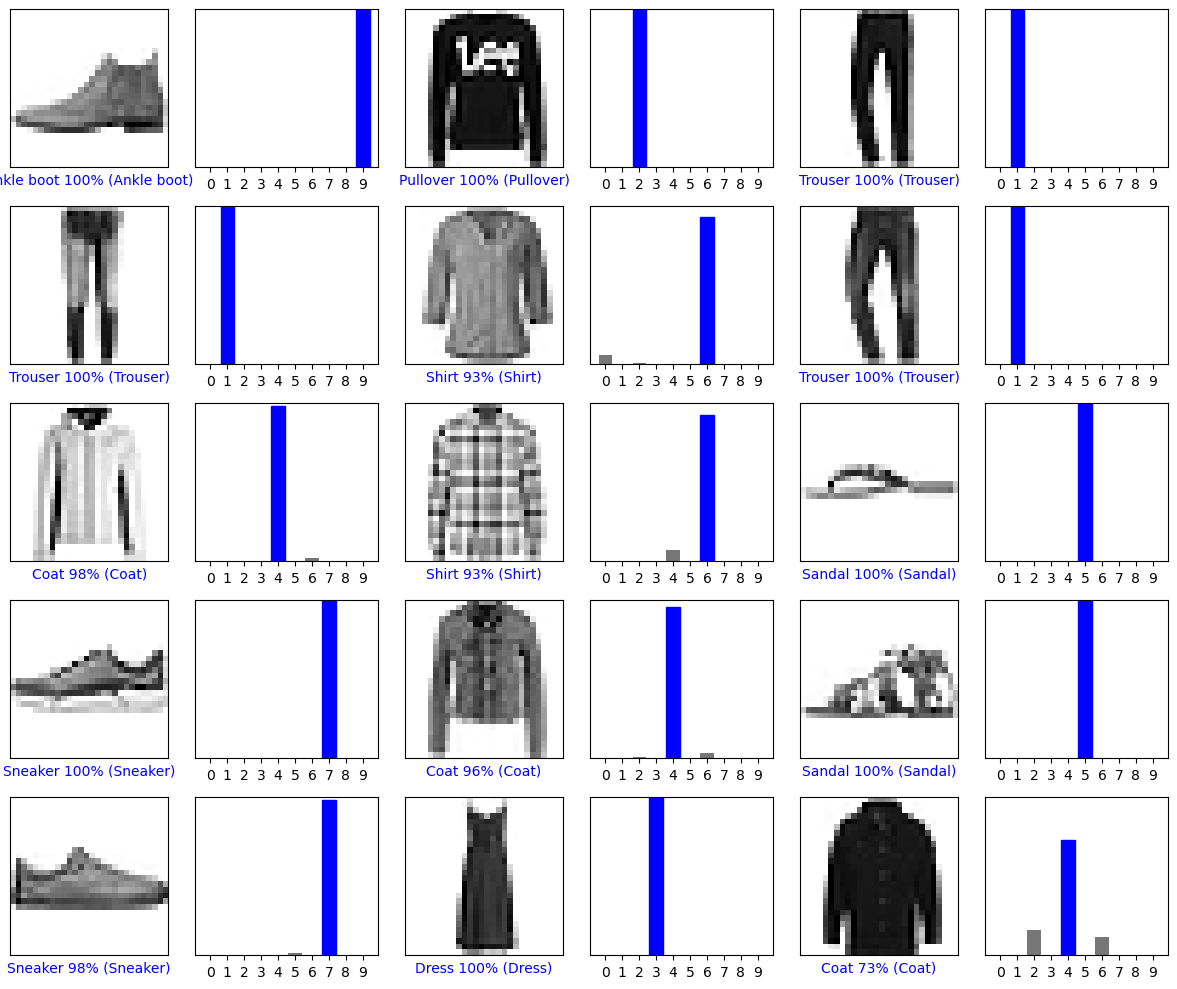

In [13]:
# Making predictions
probability_model = models.Sequential([model, layers.Softmax()])
nn_predictions = probability_model.predict(test_images)

predicted_labels = np.argmax(nn_predictions, axis=1)
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print(report)

# Function to plot the image, its true label, and the predicted label
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Function to plot the value array of predictions
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plotting the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, nn_predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, nn_predictions[i], test_labels)
plt.tight_layout()
plt.show()



# kNN Classifier

In [14]:
# first we have to reshape the data to fit the kNN model
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# create and train the kNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_images_flat, train_labels)

# predict/evaluate kNN
knn_predictions = knn.predict(test_images_flat)
knn_accuracy = accuracy_score(test_labels, knn_predictions)

print('kNN Test Accuracy: ', knn_accuracy)

knn_report = classification_report(test_labels, knn_predictions, target_names=class_names)
print("Classification Report for kNN:\n", knn_report)

kNN Test Accuracy:  0.8554
Classification Report for kNN:
               precision    recall  f1-score   support

 T-shirt/top       0.77      0.85      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.73      0.82      0.77      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.79      0.77      0.78      1000
      Sandal       0.99      0.82      0.90      1000
       Shirt       0.66      0.57      0.61      1000
     Sneaker       0.88      0.96      0.92      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



# Logistic Regression Classifier

In [15]:
# creates a logistic classifier and fits it to the flattened training set
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(train_images_flat, train_labels)

# predicts and evaluates accuracy of the model
logistic_predictions = logistic_model.predict(test_images_flat)
logistic_accuracy = accuracy_score(test_labels, logistic_predictions)
print('Logistic Regression Test accuracy:', logistic_accuracy)

logistic_report = classification_report(test_labels, logistic_predictions, target_names=class_names)
print("Classification Report for Logistic Regression:\n", logistic_report)

Logistic Regression Test accuracy: 0.8433
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

 T-shirt/top       0.80      0.80      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.72      0.73      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.62      0.57      0.59      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.93      0.93      0.93      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Decision Tree Classifier

In [16]:
# load and preprocess data
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# normalize pixel values to 0 and 1
train_images_flat, test_images_flat = train_images_flat / 255.0, test_images_flat / 255.0

# initialize and train the classifier
dt_classifier = DecisionTreeClassifier(max_depth=10, criterion='entropy', splitter='best')
dt_classifier.fit(train_images_flat, train_labels)

# predict and evaluate
dt_predictions = dt_classifier.predict(test_images_flat)
dt_accuracy = accuracy_score(test_labels, dt_predictions)
print('Decision Tree Test Accuracy:', dt_accuracy)

dt_report = classification_report(test_labels, dt_predictions, target_names=class_names)
print("Classification Report for Decision Tree:\n", dt_report)

KeyboardInterrupt: 

# Model Comparisons

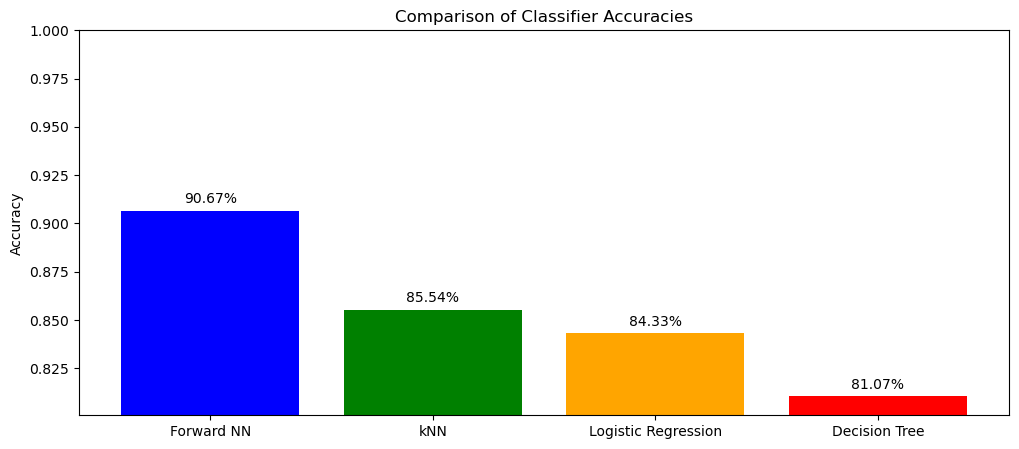

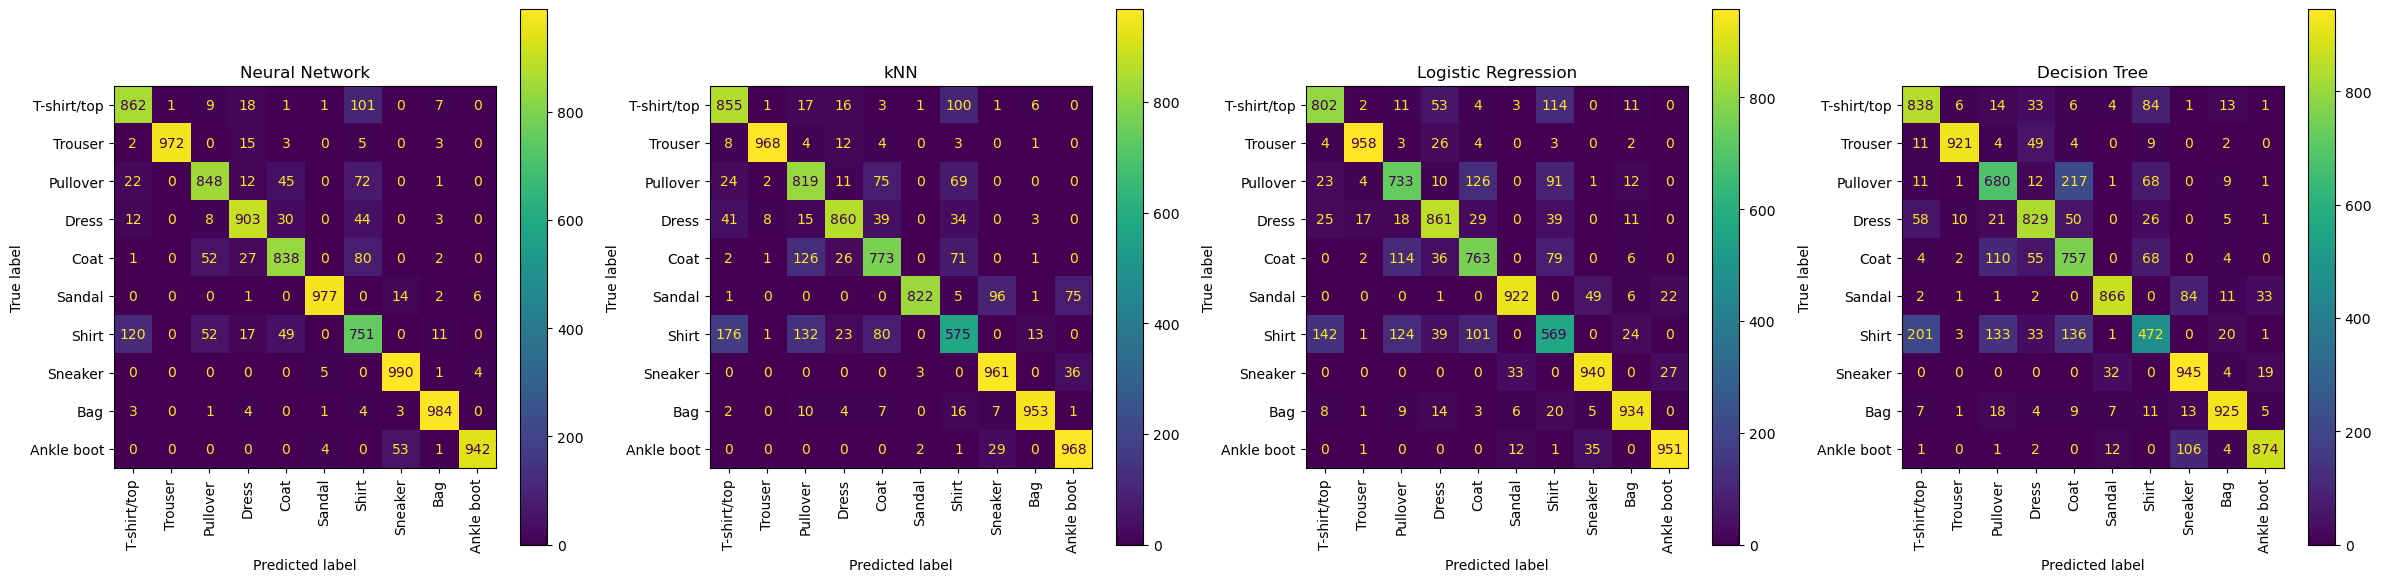

In [9]:
# plots comparison of classifiers

# Plot comparison of classifiers with adjusted y-axis scale
models = ['Forward NN', 'kNN', 'Logistic Regression', 'Decision Tree']
accuracies = [test_acc, knn_accuracy, logistic_accuracy, dt_accuracy]

plt.figure(figsize=(12, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim([min(accuracies) - 0.01, 1])  # Adjusting y-axis scale for better visual comparison

# Annotate each bar with the accuracy value
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

# Plot Confusion Matrices for each classifier
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
cm_nn = confusion_matrix(test_labels, np.argmax(nn_predictions, axis=1))
cm_knn = confusion_matrix(test_labels, knn_predictions)
cm_logistic = confusion_matrix(test_labels, logistic_predictions)
cm_dt = confusion_matrix(test_labels, dt_predictions)

ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=class_names).plot(ax=axes[0], xticks_rotation='vertical')
axes[0].set_title('Neural Network')

ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names).plot(ax=axes[1], xticks_rotation='vertical')
axes[1].set_title('kNN')

ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=class_names).plot(ax=axes[2], xticks_rotation='vertical')
axes[2].set_title('Logistic Regression')

ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=class_names).plot(ax=axes[3], xticks_rotation='vertical')
axes[3].set_title('Decision Tree')

plt.tight_layout()
plt.show()